### **1.Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
#Ignoring unwanted warning
import warnings
warnings.filterwarnings('ignore')

### **2.Load the dataset**

In [3]:
data=pd.read_excel("Stock Price Prediction.xlsx")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### **3.Checking Null Values**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


### **4.Feature Extraction**

In [6]:
x=data[['Open','High','Low','Close','Volume']]
y=data[['Adj Close']]

### **5.Standardizing the Data using StandardScaler**

In [7]:
sd=StandardScaler()
x_scaled=sd.fit_transform(x)

### **6.Splitting The Data into Training and Testing Sets**

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

### **7.Initializing and Fitting Of Data in Model**

In [9]:
model=LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

### **8.Prediction of Model**

In [11]:
y_pred=model.predict(x_test)

### **9.Finding Error in Prediction**

In [12]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:{0}".format(mse))
print("R2 Score:{0}".format(r2))

Mean Squared Error:1.098919169291325e-26
R2 Score:1.0


### **9.Analysing the Result**

### **Mean Sqaured Error**
The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values.

A value of **1.095e-26** is extremely close to zero, indicating that the predicted values are almost identical to the actual values.

This suggests that your model has performed exceptionally well on the test data.

### **R2 Score**
The R2 score (coefficient of determination) indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

An R2 score of **1.0** indicates a perfect fit, meaning the model explains all the variance in the target variable.

This is an ideal scenario in linear regression, where the predictions are perfectly aligned with the actual data.

***Both the MSE and R2 scores suggest that your model is highly accurate. The near-zero MSE indicates negligible error between the actual and predicted values, while an R2 score of 1.0 means the model perfectly captures the relationship between the features and the target variable.***


### **10.Visualizing the Prediction Results**

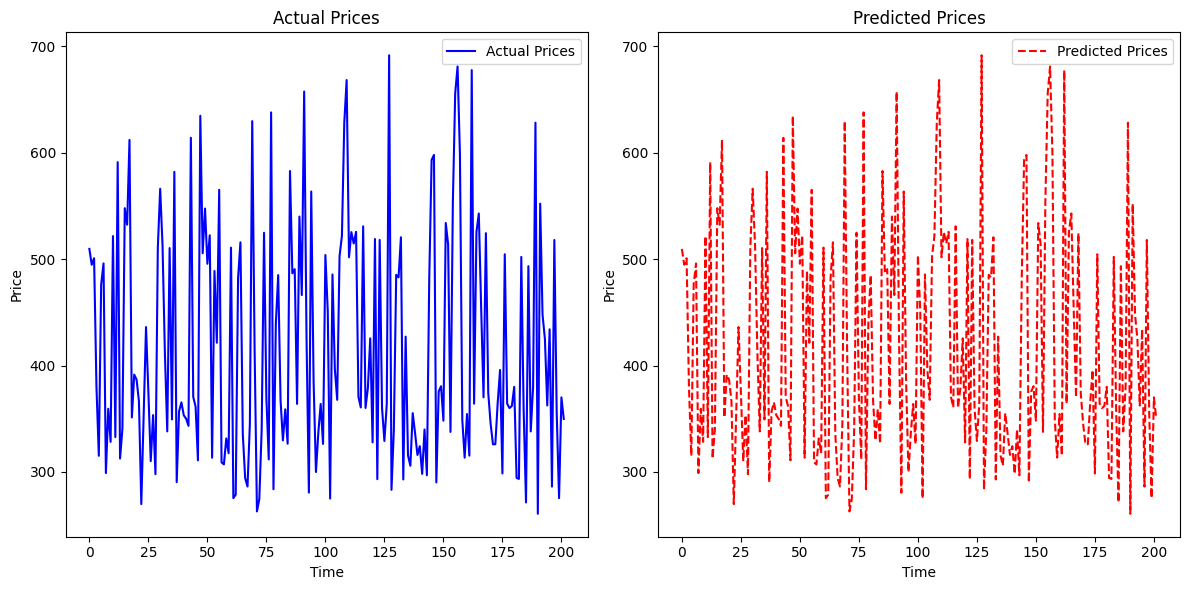

In [13]:
plt.figure(figsize=(12, 6))

# Subplot 1: Actual Prices
plt.subplot(1, 2, 1)
plt.plot(y_test.reset_index(drop=True), label='Actual Prices', color='blue')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Actual Prices')

# Subplot 2: Predicted Prices
plt.subplot(1, 2, 2)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Predicted Prices')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

### **10.Analysing the Result**

**Fluctuation:** Both the actual and predicted prices exhibit significant fluctuations over time. This suggests that the underlying factors influencing the price are dynamic and change frequently.

**General Trend:** Both curves seem to follow a similar overall pattern, indicating that the prediction model has captured some of the underlying trends in the data.

**Visual Inspection:** The predicted prices (red dashed line) appear to follow the general shape of the actual prices (blue line) reasonably well. However, there are noticeable discrepancies, especially during periods of rapid price changes.

**Quantitative Evaluation:** To assess the prediction accuracy more precisely, we would need to calculate metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE). These metrics would provide numerical values to quantify the prediction error.


### **11.Prediction using Stacking Regressor**

In [14]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Define the base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('ada', AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define the Stacking Regressor with a meta-model
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the Stacking model
stacking_model.fit(x_train, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(x_test)

# Evaluate the Stacking model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Model Mean Squared Error: {mse_stacking}")
print(f"Stacking Model R-squared: {r2_stacking}")


Stacking Model Mean Squared Error: 0.9359723560753604
Stacking Model R-squared: 0.9999197283326587


### **9.Analysing the Result**

### **Mean Sqaured Error**

An MSE of approximately **0.936** is quite low, indicating that the predictions made by the stacking model are very close to the actual values.

While not as close to zero as the previous linear regression model's MSE, this is still an excellent result, suggesting minimal prediction error.

### **R2 Score**

An R2 score of approximately **0.9999** suggests that the stacking model explains nearly all the variance in the target variable, leaving only a tiny fraction unexplained.

This value is very close to 1.0, implying that the model is highly effective at capturing the relationship between the input features and the target variable.

***The stacking model is performing exceptionally well, with an almost perfect fit as indicated by the very high R2 score and low MSE.
The MSE is slightly higher, and the R2 score is slightly lower than what you observed with the simple linear regression model. However, these differences are minimal and indicate that both models are highly accurate.***

### **Comparison with Linear Regression:**
The stacking model has slightly higher MSE and slightly lower R² than the linear regression model, which might suggest that the linear regression model, under certain conditions, performed marginally better on this specific dataset.
However, stacking models generally provide better generalization, especially when dealing with more complex datasets. This is because stacking combines multiple models to improve overall performance, making it more robust in various scenarios.

### **12.Custom Input Prediction**

In [15]:
# Input values
open_price = 300			
close_price = 500
high_price = 289
low_price = 200
volume = 11896100

# Create a list of input features
list1 = [open_price, high_price, low_price, close_price, volume]

# Convert the list to a 2D array with shape (1, 5) (1 sample, 5 features)
arr = np.array(list1).reshape(1, -1)

# Scale the input features using the same scaler used for training
arr_scaled = sd.transform(arr)

# Make the prediction
pred = model.predict(arr_scaled)

#To extract Prediction Output from 2D Array
value = pred.flatten()[0]

print("Prediction:{0}".format(value))


Prediction:499.9999999999999


### **13.Custom Input Prediction with Stacking Regressor**

In [16]:
pred=stacking_model.predict(arr_scaled)

#To extract Prediction Output from 2D Array
value = pred.flatten()[0]

print("Prediction:{0}".format(value))

Prediction:489.17131450346466
